## **Data Understanding**

**Import Library**

In [ ]:
#melakukan import library
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as ex
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
import itertools
from sklearn import metrics

**Meload dataste dari github**

In [ ]:
# load dataset
url = 'https://raw.githubusercontent.com/muhamadilyas17/capstone/main/water_potability.csv'
kualitas_air = pd.read_csv(url)
kualitas_air

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


**Cek Tipe Data**

In [ ]:
#mengecek dataset
kualitas_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


**Describe Data**

In [ ]:
#mendeskripsikann data
kualitas_air.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## **Data Preparation**

**Mengatasi Missing Value**

In [ ]:
#cek missing value
kualitas_air.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

**Mengisi Nilai Null dan Merawat Nilai yang hilang**

Kekerasan merupakan salah satu faktor yang mempengaruhi pH air. Para ilmuwan mengukur kekerasan air menggunakan skala pH, yang mengukur konsentrasi ion hidrogen dalam cairan. Air dengan pH rendah lebih bersifat asam, sedangkan air dengan pH lebih tinggi lebih keras atau lebih basa, artinya mampu menetralkan asam. pH air menentukan kelayakan air.

In [ ]:
x = kualitas_air[(kualitas_air['Potability']==0) & (kualitas_air['Hardness']<=150)][['ph']].mean()
x

ph    6.721973
dtype: float64

In [ ]:
y = kualitas_air[(kualitas_air['Potability']==0) & (kualitas_air['Hardness']>150)][['ph']].mean()
y

ph    7.112512
dtype: float64

In [ ]:
z = kualitas_air[(kualitas_air['Potability']==1) & (kualitas_air['Hardness']<=150)][['ph']].mean()
z

ph    7.098154
dtype: float64

In [ ]:
o = kualitas_air[(kualitas_air['Potability']==1) & (kualitas_air['Hardness']>150)][['ph']].mean()
o

ph    7.071429
dtype: float64

In [ ]:
#mengisi nilai null
for i in range (0,len(kualitas_air)):
    if (pd.isnull(kualitas_air['ph'][i]) == True):
        if ((kualitas_air['Potability'][i]==0) & (kualitas_air['Hardness'][i]<=150)):
            kualitas_air['ph'][i] = x
        elif ((kualitas_air['Potability'][i]==0) & (kualitas_air['Hardness'][i]>150)):
            kualitas_air['ph'][i] = y
        elif ((kualitas_air['Potability'][i]==1) & (kualitas_air['Hardness'][i]<=150)):
             kualitas_air['ph'][i] = z
        else:
             kualitas_air['ph'][i] = o

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying 

Kehadiran sulfat dalam air minum salah satu faktor penting untuk menentukan kelayakan air

In [ ]:
x = kualitas_air[(kualitas_air['Potability']==0)][['Sulfate']].mean()
x

Sulfate    334.56429
dtype: float64

In [ ]:
y = kualitas_air[(kualitas_air['Potability']==1)][['Sulfate']].mean()
y

Sulfate    332.56699
dtype: float64

In [ ]:
#mengisi nilai null pada kolom sulfate
for i in range(0,len(kualitas_air)):
  if (pd.isnull(kualitas_air['Sulfate'][i]) == True):
    if (kualitas_air['Potability'][i] == 0) :
      kualitas_air['Sulfate'][i] = x
    else :
      kualitas_air['Sulfate'][i] = y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#mengisi nilai null pada kolom Trihalomethanes
kualitas_air['Trihalomethanes'].fillna(value = kualitas_air['Trihalomethanes'].mean() , inplace = True)

In [ ]:
#mengecek nilai null
kualitas_air.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

**Membulatkan PH**

In [ ]:
kualitas_air['ph'] = kualitas_air['ph'].round(decimals=1)
kualitas_air['ph'].head()

0    7.1
1    3.7
2    8.1
3    8.3
4    9.1
Name: ph, dtype: float64

In [ ]:
kualitas_air['Hardness'] = kualitas_air['Hardness'].round(decimals=1)
kualitas_air['Hardness'].head()

0    204.9
1    129.4
2    224.2
3    214.4
4    181.1
Name: Hardness, dtype: float64

In [ ]:
kualitas_air['Solids'] = kualitas_air['Solids'].round(decimals=1)
kualitas_air['Solids'].head()

0    20791.3
1    18630.1
2    19909.5
3    22018.4
4    17979.0
Name: Solids, dtype: float64

In [ ]:
kualitas_air['Chloramines'] = kualitas_air['Chloramines'].round(decimals=1)
kualitas_air['Chloramines'].head()

0    7.3
1    6.6
2    9.3
3    8.1
4    6.5
Name: Chloramines, dtype: float64

In [ ]:
kualitas_air['Sulfate'] = kualitas_air['Sulfate'].round(decimals=1)
kualitas_air['Sulfate'].head()

0    368.5
1    334.6
2    334.6
3    356.9
4    310.1
Name: Sulfate, dtype: float64

In [ ]:
kualitas_air['Conductivity'] = kualitas_air['Conductivity'].round(decimals=1)
kualitas_air['Conductivity'].head()

0    564.3
1    592.9
2    418.6
3    363.3
4    398.4
Name: Conductivity, dtype: float64

In [ ]:
kualitas_air['Organic_carbon'] = kualitas_air['Organic_carbon'].round(decimals=1)
kualitas_air['Organic_carbon'].head()

0    10.4
1    15.2
2    16.9
3    18.4
4    11.6
Name: Organic_carbon, dtype: float64

In [ ]:
kualitas_air['Trihalomethanes'] = kualitas_air['Trihalomethanes'].round(decimals=1)
kualitas_air['Trihalomethanes'].head()

0     87.0
1     56.3
2     66.4
3    100.3
4     32.0
Name: Trihalomethanes, dtype: float64

In [ ]:
kualitas_air['Turbidity'] = kualitas_air['Turbidity'].round(decimals=1)
kualitas_air['Turbidity'].head()

0    3.0
1    4.5
2    3.1
3    4.6
4    4.1
Name: Turbidity, dtype: float64

**Tipe-Tipe Air**

In [ ]:
kualitas_air['Zat Air'] = ""
for i in range(0,len(kualitas_air)):
  if (kualitas_air['ph'][i] >= 0 and kualitas_air['ph'][i] < 6.5):
    kualitas_air['Zat Air'][i] = "Asam"
  elif (kualitas_air['ph'][i] >= 6.5 and kualitas_air['ph'][i] < 8.5):
    kualitas_air['Zat Air'][i] = "Air Netral"
  elif (kualitas_air['ph'][i] >= 8.5 and kualitas_air['ph'][i] < 14):
    kualitas_air['Zat Air'][i] = "Basa"
  else :
    kualitas_air['Zat Air'][i] = "Basa"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying 

In [ ]:
kualitas_air

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Zat Air
0,7.1,204.9,20791.3,7.3,368.5,564.3,10.4,87.0,3.0,0,Air Netral
1,3.7,129.4,18630.1,6.6,334.6,592.9,15.2,56.3,4.5,0,Asam
2,8.1,224.2,19909.5,9.3,334.6,418.6,16.9,66.4,3.1,0,Air Netral
3,8.3,214.4,22018.4,8.1,356.9,363.3,18.4,100.3,4.6,0,Air Netral
4,9.1,181.1,17979.0,6.5,310.1,398.4,11.6,32.0,4.1,0,Basa
...,...,...,...,...,...,...,...,...,...,...,...
3271,4.7,193.7,47581.0,7.2,359.9,526.4,13.9,66.7,4.4,1,Asam
3272,7.8,193.6,17329.8,8.1,332.6,392.4,19.9,66.4,2.8,1,Air Netral
3273,9.4,175.8,33155.6,7.4,332.6,432.0,11.0,69.8,3.3,1,Basa
3274,5.1,230.6,11983.9,6.3,332.6,402.9,11.2,77.5,4.7,1,Asam


## **Data Visualization**

In [ ]:
#Visualisasi Potability / air dapat di minum
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=kualitas_air['Potability'],name='Box Plot Pembagian Potability',boxmean=True)
tr2=go.Histogram(x=kualitas_air['Potability'],name='Histogram Pembagian Potability')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Pembagian Pembagian Potability")
fig.show()
ex.pie(kualitas_air,names='Potability',title='Pembagian Pembagian Potability',hole=0.33)

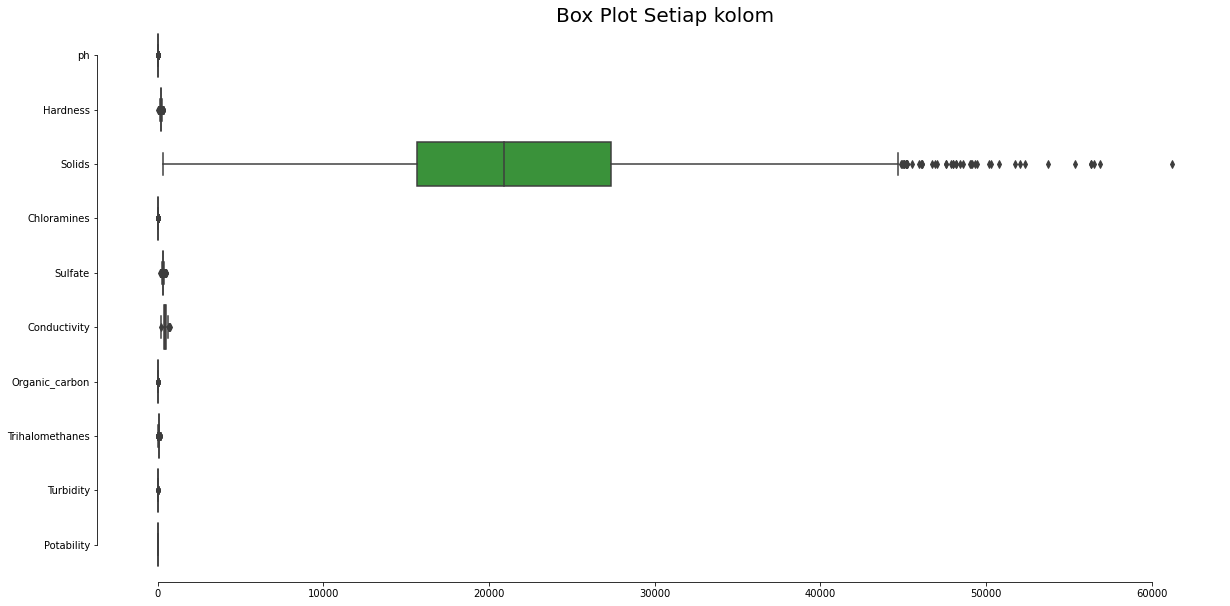

In [ ]:
#Box Plot Setiap kolom
fig1, ax = plt.subplots(figsize=[20, 10])
ax = sb.boxplot(data=kualitas_air, orient='h')
sb.despine(offset=10, trim=True)
plt.title('Box Plot Setiap kolom', fontsize=20)
plt.show()

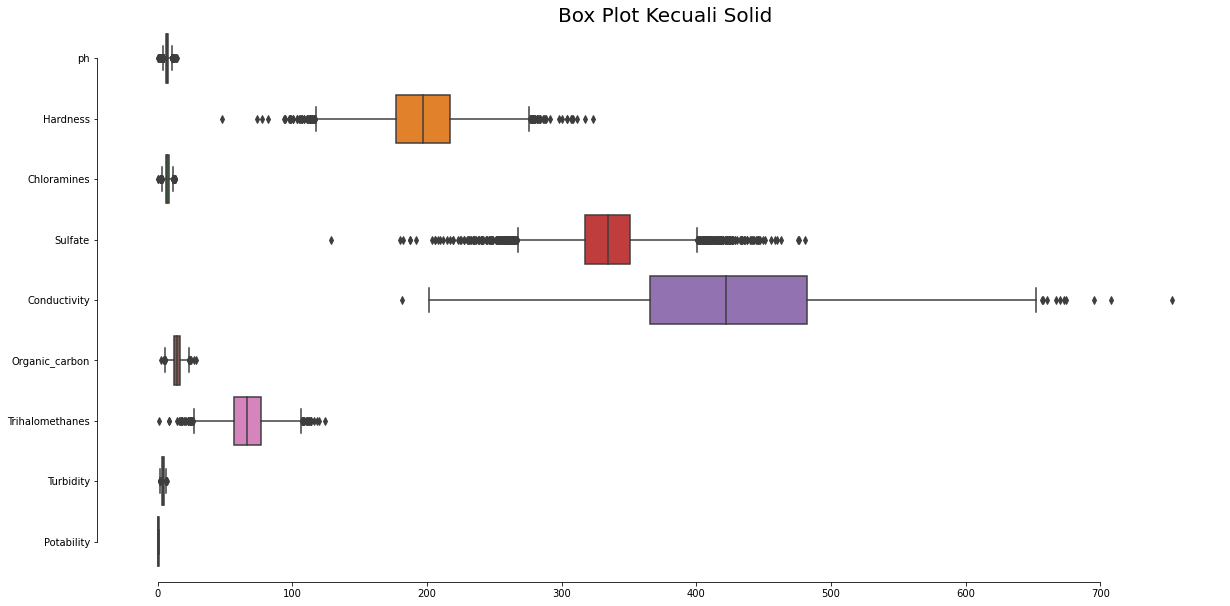

In [ ]:
#Box Plot Kecuali Solid
air1 = pd.DataFrame()
air1 = kualitas_air
air1 = air1.drop('Solids',1)
fig1, ax = plt.subplots(figsize=[20,10])
ax = sb.boxplot(data=air1, orient='h')
sb.despine(offset=10, trim=True)
plt.title('Box Plot Kecuali Solid', fontsize=20)
plt.show()

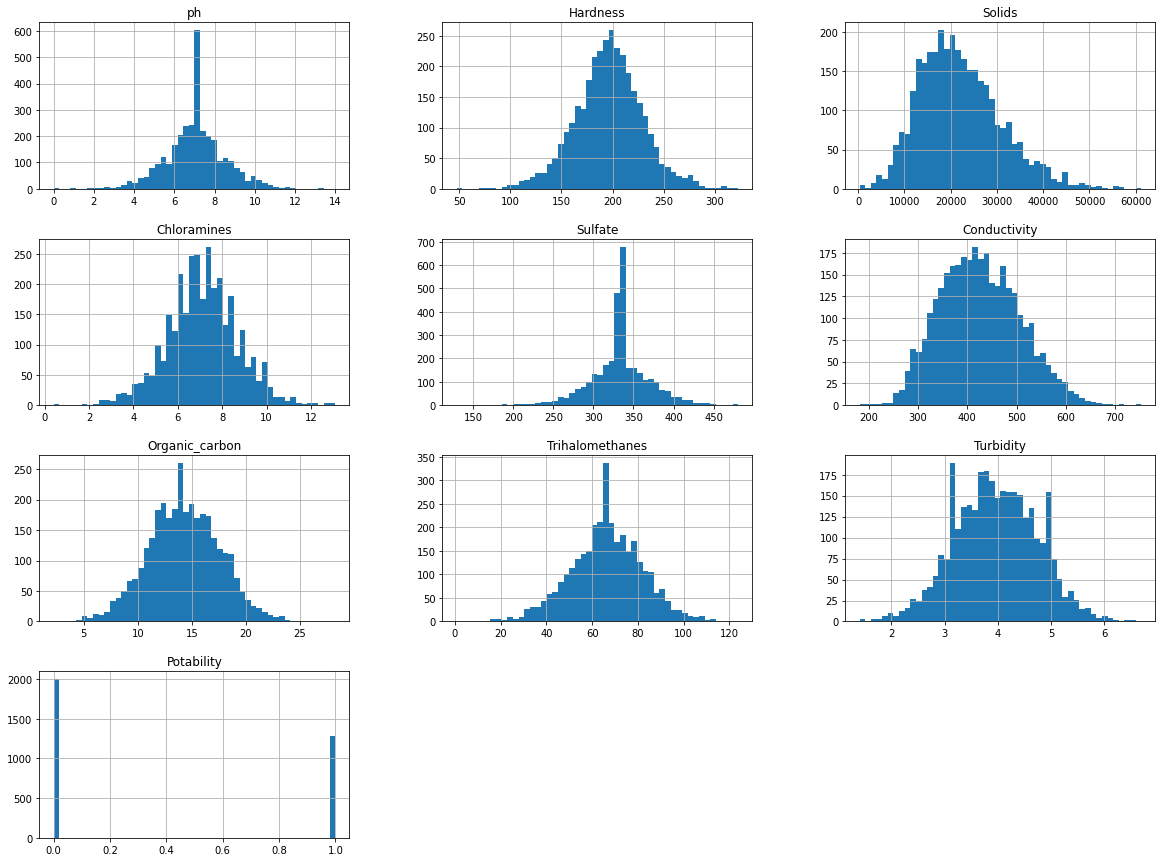

In [ ]:
#fitur numerik
kualitas_air.hist(bins=50, figsize=(20,15))
plt.show()

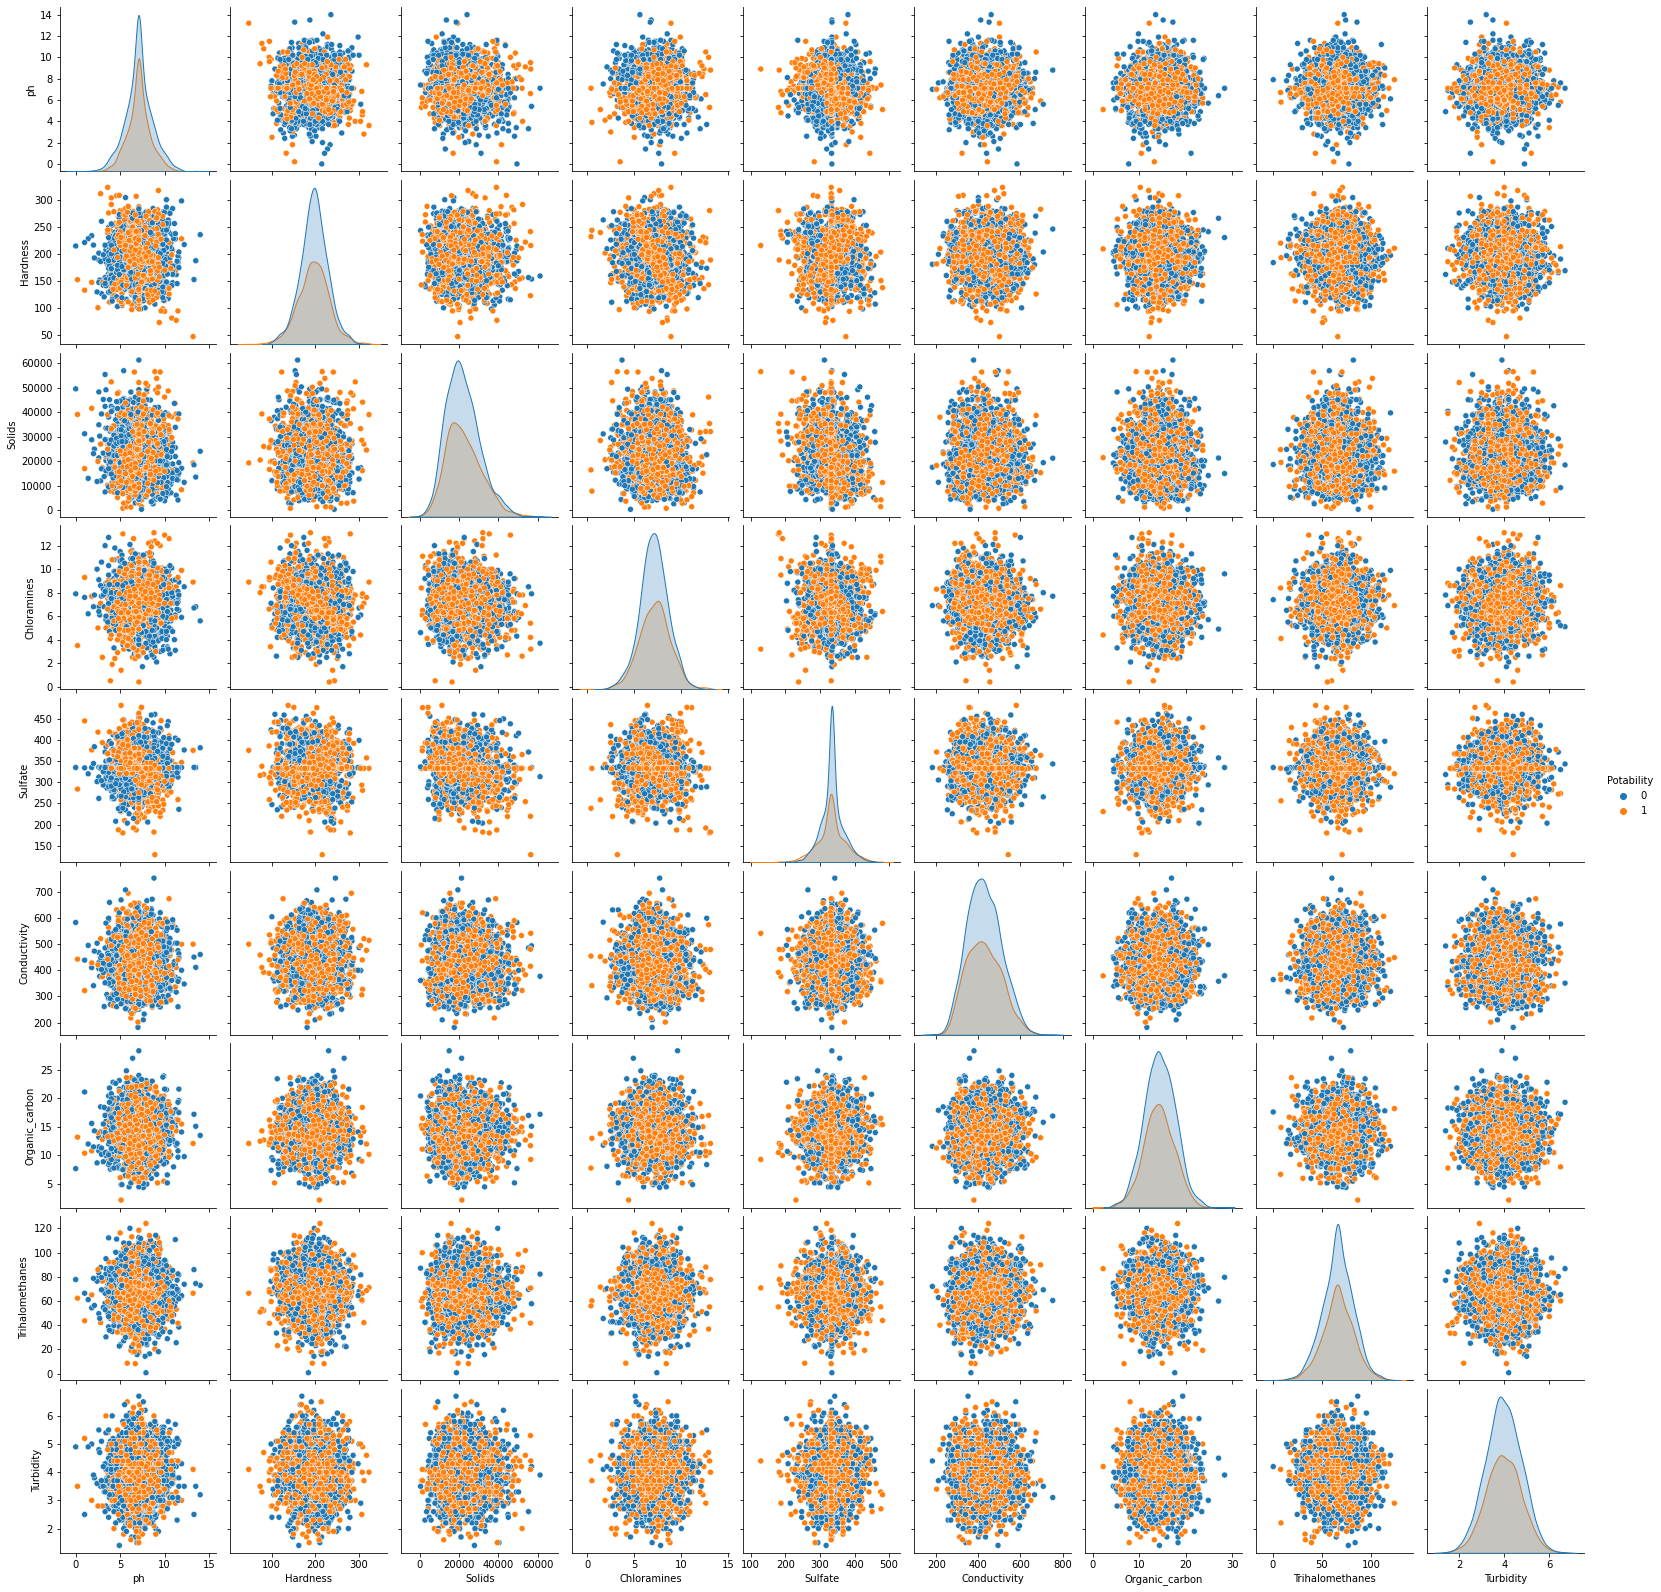

In [ ]:
#mengamati hubungan antar fitur numerik
sb.pairplot(kualitas_air, hue='Potability', diag_kind = 'kde')

Text(0.5, 1.0, 'Korelasi Matrix untuk Fitur Numerik')

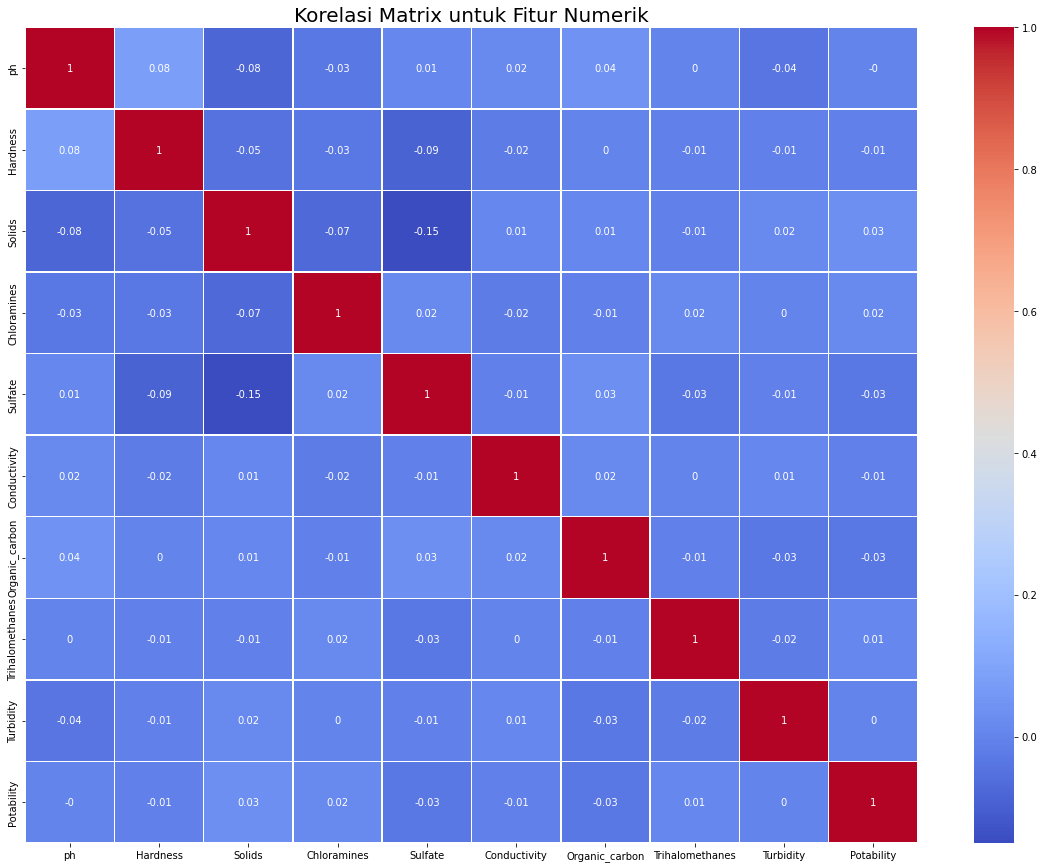

In [ ]:
#evaluasi korelasi Matrix untuk Fitur Numerik
plt.figure(figsize=(20,15))
correlation_matrix = kualitas_air.corr().round(2)
sb.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Matrix untuk Fitur Numerik', size=20)

**Relasi Antar Fitur**

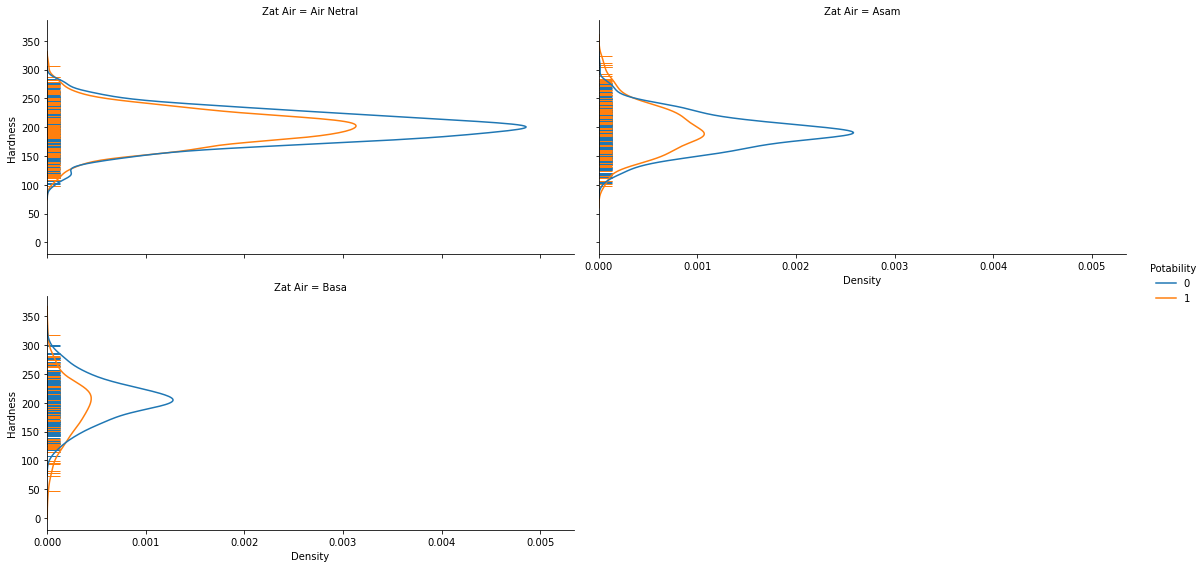

In [ ]:
#Hubungan hardness dengan potability
x = sb.displot(data=kualitas_air, y='Hardness', hue='Potability', col='Zat Air', 
               col_wrap=2, kind='kde', height=4, aspect=2, rug=True)
plt.show()

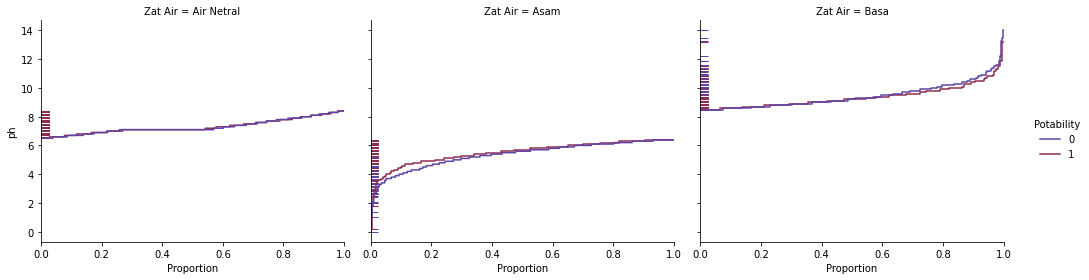

In [ ]:
#Hubungan antara ph dan potability
x = sb.displot(data=kualitas_air, y='ph', hue='Potability', col='Zat Air', palette = 'twilight', col_wrap=3,
    kind='ecdf', height=4, aspect=1.2,rug=True)
plt.show()

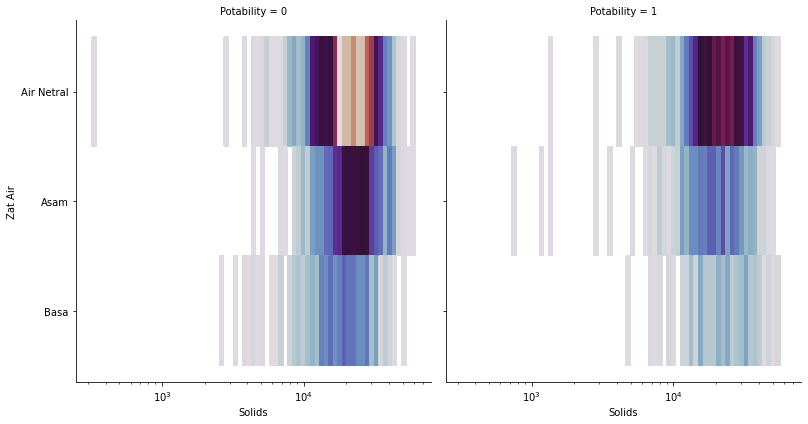

In [ ]:
#Hubungan Antara Solid dan Potability
x = sb.displot(data=kualitas_air, x='Solids', y='Zat Air', col='Potability', cmap = 'twilight', 
               log_scale=(True, False), col_wrap=4, height=6, aspect=.9)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning:

The following kwargs were not used by contour: 'aspect'



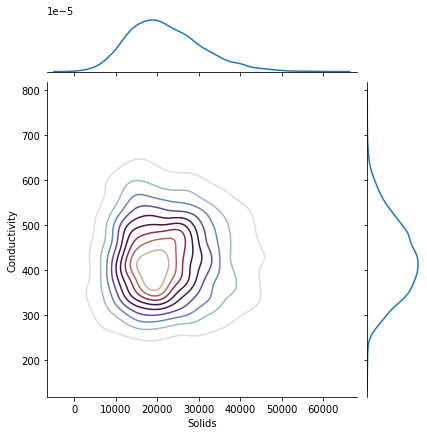

In [ ]:
#Hubungan antara Solids dengan Conductivity
x = sb.jointplot(data=kualitas_air, x='Solids', y='Conductivity', cmap = 'twilight', 
               kind='kde', height=6, aspect=.9)
plt.show()

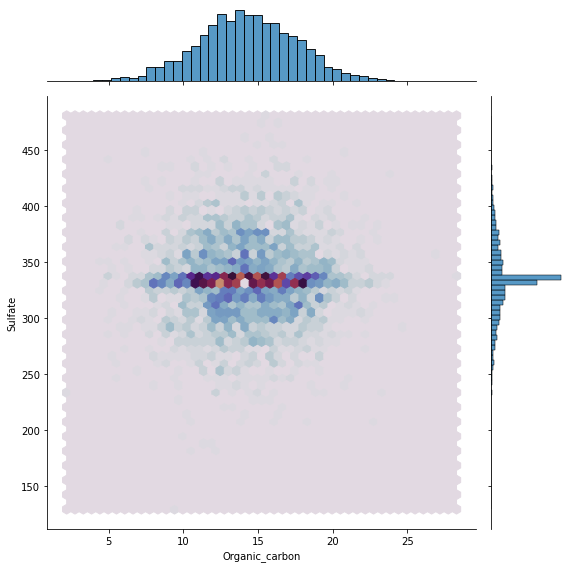

In [ ]:
#Hubungan antara Organic_carbon dan Sulfat
x = sb.jointplot(data=kualitas_air, x='Organic_carbon', y='Sulfate', cmap = 'twilight', 
               kind='hex', height=8)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1740: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



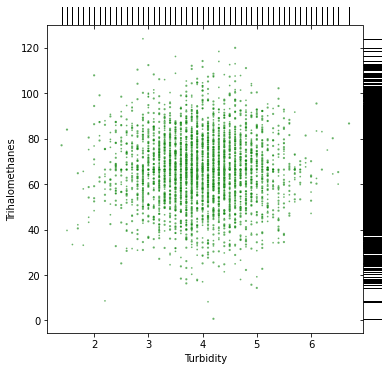

In [ ]:
#Hubungan antara Turbidity dan Trihalomethanes
x = sb.JointGrid(data=kualitas_air, x="Turbidity", y="Trihalomethanes", space=0, ratio=17)
x.plot_joint(sb.scatterplot, size=kualitas_air["Potability"], sizes=(3, 5),
             color="green", alpha=.6, legend=False)
x.plot_marginals(sb.rugplot, height=15, alpha=1,color="Black")

## **Data Preprocessing**

**One-Hot-Encoding**

In [ ]:
data = pd.get_dummies(kualitas_air, columns = ['Zat Air'])
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Zat Air_Air Netral,Zat Air_Asam,Zat Air_Basa
0,7.1,204.9,20791.3,7.3,368.5,564.3,10.4,87.0,3.0,0,1,0,0
1,3.7,129.4,18630.1,6.6,334.6,592.9,15.2,56.3,4.5,0,0,1,0
2,8.1,224.2,19909.5,9.3,334.6,418.6,16.9,66.4,3.1,0,1,0,0
3,8.3,214.4,22018.4,8.1,356.9,363.3,18.4,100.3,4.6,0,1,0,0
4,9.1,181.1,17979.0,6.5,310.1,398.4,11.6,32.0,4.1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.7,193.7,47581.0,7.2,359.9,526.4,13.9,66.7,4.4,1,0,1,0
3272,7.8,193.6,17329.8,8.1,332.6,392.4,19.9,66.4,2.8,1,1,0,0
3273,9.4,175.8,33155.6,7.4,332.6,432.0,11.0,69.8,3.3,1,0,0,1
3274,5.1,230.6,11983.9,6.3,332.6,402.9,11.2,77.5,4.7,1,0,1,0


**Split Dataset**

In [ ]:
#Split Dataset
x = data.drop(['Potability'], axis=1)
y = data['Potability']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=600)

**Standarisasi data**

In [ ]:
#standarisasi data
scaller = StandardScaler()
X_train = scaller.fit_transform(x_train)
X_test = scaller.fit_transform(x_test)

In [ ]:
#Menambahkan Cross Validasi
cv = ShuffleSplit(n_splits=5)
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, X_train, y_train, cv=cv)

array([0.74242424, 0.5       , 0.59090909, 0.66666667, 0.60606061])

## **Model Dan Evaluasi**

**Model**

In [ ]:
#RandomForest
RF = RandomForestClassifier(n_estimators=600,
                            max_features=12)
model = RF.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
#Akurasi Model
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7157573445249905


In [ ]:
X_train.shape

(655, 12)

In [ ]:
X_test.shape

(2621, 12)

In [ ]:
conf = metrics.confusion_matrix(y_test, y_pred)
conf

array([[1269,  363],
       [ 358,  631]])

Text(0.5, 15.0, 'Label Prediksi')

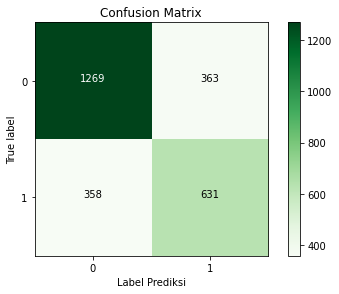

In [ ]:
classes = [0, 1]
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Label Prediksi')

In [ ]:
#hasil dari confusion matrix
TP = true_pos = 1269
TN = true_neg = 631
FP = false_pos = 363
FN = false_neg = 358

In [ ]:
results = {}

#### **Accuracy**
Jumlah contoh yang diprediksi dengan benar / jumlah total contoh. 
![Rumus Accuracy](https://wikimedia.org/api/rest_v1/media/math/render/svg/c72ec21ef2505c2d376e96197637fc64f75e5891)

In [ ]:
#Accuracy
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.725


#### **True Positive Rate**
Jumlah sampel sebenarnya dan diprediksi sebagai Positif / jumlah sampel sebenarnya Positif disebut juga dengan **Sensitivity or Recall**.  
![Rumus Recall](https://wikimedia.org/api/rest_v1/media/math/render/svg/64d5540cbadeb83f864d7a731b7ab43cccd0f353)


In [ ]:
# Recall
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.780


#### **Positive Predictive Value**
Jumlah sampel sebenarnya dan diprediksi sebagai Positif / jumlah sampel yang diprediksi sebagai Positif disebut juga dengan **Precision**.  
![Rumus Precision](https://wikimedia.org/api/rest_v1/media/math/render/svg/699fcdb880b7f6a92742bc0845b8b60b59806a98)


In [ ]:
# Precision
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

PPV is  0.778


#### **Membandingkan metrik yang dihitung ini**

In [ ]:
print(f"Calculated and Actual Accuracy:                          {results['ACC']: .3f}, {metrics.accuracy_score(y_test, y_pred): .3f}")
print(f"Calculated and Actual Precision score:                   {results['PPV']: .3f}, {metrics.precision_score(y_test, y_pred): .3f}")
print(f"Calculated and Actual Recall score:                      {results['TPR']: .3f}, {metrics.recall_score(y_test, y_pred): .3f}")

Calculated and Actual Accuracy:                           0.725,  0.725
Calculated and Actual Precision score:                    0.778,  0.635
Calculated and Actual Recall score:                       0.780,  0.638


In [ ]:
import pickle

filename = 'app.pkl'
pickle.dump(model, open(filename, 'wb'))